# Interactive Hapke model

Using `ipywidgets` one can create a basic widget that lets us vary various model parameters and inspect their effect on the model output in real time.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import frostie.hapke as hapke
import frostie.utils as utils


The `%matplotlib widget` magic command enables widgets to be run in Jupyter notebooks. 

## Widget Example 1: One component model with a *grain-size* parameter slider.

Following the example from the one-component model notebook, let's set up a regolith of water ice and calculate its reflectance

In [2]:
regolith = hapke.regolith()

wav_water, n_water, k_water = utils.load_water_op_cons()

water = {'name':'h2o', 'n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2'}

regolith.add_components([water])

regolith.set_obs_geometry(i=45,e=45,g=90)

regolith.set_porosity(porosity=0.9)

regolith.set_backscattering(B=0)

regolith.set_s(s=0)

regolith.calculate_reflectance()

Next, we will create and show two widgets: `output` to show the model output, and `controls` that will contain our parameter controls, which here has only one slider for the grain-size parameter.

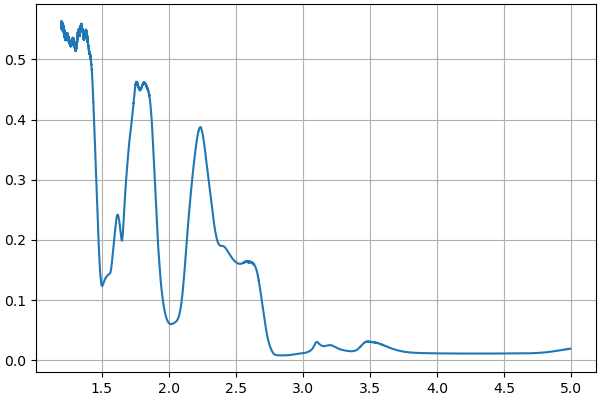

In [3]:
### create output widget

output = widgets.Output()
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    fig.canvas.header_visible = False 
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(regolith.wav_model, regolith.model)


### create some control elements
D_water_slider = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='H₂O grain size', style=dict(description_width='initial'))
 
# callback functions
def update_D_water(change):
    """redraw line (update plot)"""
    regolith.components[0]['D'] = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()
 
# connect callbacks and traits
D_water_slider.observe(update_D_water, 'value')

### combine output and control elements widgets
controls = widgets.VBox([D_water_slider])
widgets.VBox([controls, output])

## 2. Widget Example 2: Two component model with sliders for many parameters.

Building on the example above, we can increase the complexity of our widget by adding more components (here we will add one more component, CO$2$), and slider controls for many parameters: abundance, grain size, porosity, and observation geometry.

First, we will define the regolith of water ice and carbon dioxide ice.

In [4]:
f = 0.5    # equal abundance (by number) fraction

regolith = hapke.regolith()

wav_water, n_water, k_water = utils.load_water_op_cons()
wav_co2, n_co2, k_co2 = utils.load_co2_op_cons()

water = {'name':'water','n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2', 'f':f}
co2 = {'name':'carbon dioxide', 'n':n_co2, 'k':k_co2, 'wav':wav_co2, 'D':100, 'p_type':'HG2', 'f':f}

regolith.add_components([water, co2], matched_axes=False)

regolith.set_obs_geometry(i=45,e=45,g=90)

regolith.set_porosity(porosity=0.9)

regolith.set_backscattering(B=0)

regolith.set_s(s=0)

regolith.set_mixing_mode('intimate')

regolith.calculate_reflectance()

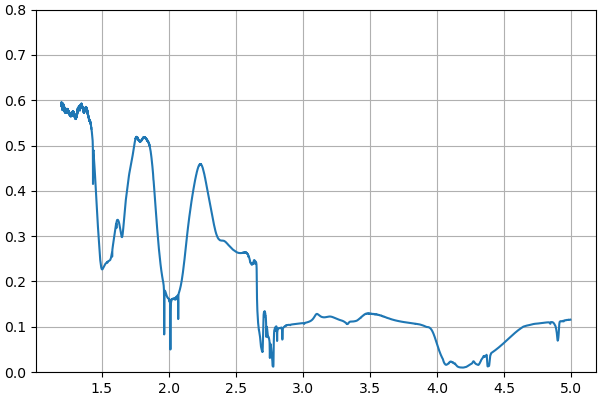

In [5]:
### create the output widget

output = widgets.Output()
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
    fig.canvas.header_visible = False 
     
# move the toolbar to the bottom
fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(regolith.wav_model, regolith.model)
ax.set_ylim((0,0.8))

### create some control elements

# fraction of water
f_water_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='H₂O fraction', style=dict(description_width='initial'))

# grain size of water
D_water_slider = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='H₂O grain size', style=dict(description_width='initial'))

# grain size of carbon dioxide
D_co2_slider = widgets.FloatSlider(value=100, min=10, max=1000, step=10, description='CO₂ grain size', style=dict(description_width='initial'))

# porosity
porosity_slider = widgets.FloatSlider(value=0.5, min=0.48, max=0.99, step=0.01, description='porosity', style=dict(description_width='initial'))

# incidence angle
i_slider = widgets.FloatSlider(value=45, min=0, max=90, step=0.5, description='inc. angle', style=dict(description_width='initial'))

# emission angle
e_slider = widgets.FloatSlider(value=45, min=0, max=90, step=0.5, description='emi. angle', style=dict(description_width='initial'))

# phase angle
g_slider = widgets.FloatSlider(value=90, min=0, max=180, step=0.5, description='phase angle', style=dict(description_width='initial'))



# callback functions

def update_f_water(change):
    """redraw line (update plot)"""
    regolith.components[0]['f'] = change.new
    regolith.components[1]['f'] = 1 - change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_D_water(change):
    """redraw line (update plot)"""
    regolith.components[0]['D'] = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_D_co2(change):
    """redraw line (update plot)"""
    regolith.components[1]['D'] = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_porosity(change):
    """redraw line (update plot)"""
    regolith.porosity = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_i(change):
    """redraw line (update plot)"""
    regolith.i = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_e(change):
    """redraw line (update plot)"""
    regolith.e = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()

def update_g(change):
    """redraw line (update plot)"""
    regolith.g = change.new
    regolith.calculate_reflectance()
    line.set_ydata(regolith.model)
    fig.canvas.draw()
 
# connect callbacks and traits

f_water_slider.observe(update_f_water, 'value')
D_water_slider.observe(update_D_water, 'value')
D_co2_slider.observe(update_D_co2, 'value')
porosity_slider.observe(update_porosity, 'value')
i_slider.observe(update_i, 'value')
e_slider.observe(update_e, 'value')
g_slider.observe(update_g, 'value')

def make_boxes():
    vbox1 = widgets.VBox([f_water_slider, D_water_slider, D_co2_slider,porosity_slider])
    vbox2 = widgets.VBox([i_slider, e_slider, g_slider])
    return vbox1, vbox2
 
vbox1, vbox2 = make_boxes()

### combine output and controls widgets

controls = widgets.HBox([vbox1, vbox2])
widgets.VBox([controls, output])